<a href="https://colab.research.google.com/github/Yashhhpatil/CodeAI-KJSIT/blob/main/sentiment_analysis/ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=7862efb3f1de12a8298f97932ca47e6462c5252d6cff6ba1405cd68ed1a630f6
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
import streamlit as st
from textblob import TextBlob
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import cleantext
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Reviews.csv")

In [ ]:
review_text = df["Text"]

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment_scores = []
blob_subj = []
for review in review_text:
    sentiment_scores.append(analyzer.polarity_scores(review)["compound"])
    blob = TextBlob(review)
    blob_subj.append(blob.subjectivity)

In [ ]:
sentiment_classes = []
for sentiment_score in sentiment_scores:
    if sentiment_score > 0.8:
        sentiment_classes.append("highly positive")
    elif sentiment_score > 0.4:
        sentiment_classes.append("positive")
    elif -0.4 <= sentiment_score <= 0.4:
        sentiment_classes.append("neutral")
    elif sentiment_score < -0.4:
        sentiment_classes.append("negative")
    else:
        sentiment_classes.append("highly negative")

In [ ]:
st.title("Sentiment Analysis On Customer Feedback")

2024-07-05 08:21:25.313 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [ ]:
user_input = st.text_area("Enter customer feedback:")
blob = TextBlob(user_input)

2024-07-05 08:21:29.260 Session state does not function when running a script without `streamlit run`


In [ ]:
user_sentiment_score = analyzer.polarity_scores(user_input)["compound"]
if user_sentiment_score > 0.8:
    user_sentiment_class = "highly positive"
elif user_sentiment_score > 0.4:
    user_sentiment_class = "positive"
elif -0.4 <= user_sentiment_score <= 0.4:
    user_sentiment_class = "neutral"
elif user_sentiment_score < -0.4:
    user_sentiment_class = "negative"
else:
    user_sentiment_class = "highly negative"

In [ ]:
st.write("**VADER Sentiment Class:** ", user_sentiment_class, "\n**VADER Sentiment Scores:**", user_sentiment_score)
st.write("**TextBlob Polarity**", blob.sentiment.polarity, "\n**TextBlob Subjectivity:**", blob.sentiment.subjectivity)


In [ ]:
pre = st.text_input('Clean Text: ')
if pre:
    st.write(cleantext.clean(pre, clean_all=False, extra_spaces=True, stopwords=True, lowercase=True, numbers=True, punct=True))
else:
    st.write("No text provided for cleaning.")

In [ ]:
st.subheader("Graphical Representation of Data")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
sentiment_scores_by_class = {k: [] for k in set(sentiment_classes)}
for sentiment_score, sentiment_class in zip(sentiment_scores, sentiment_classes):
    sentiment_scores_by_class[sentiment_class].append(sentiment_score)


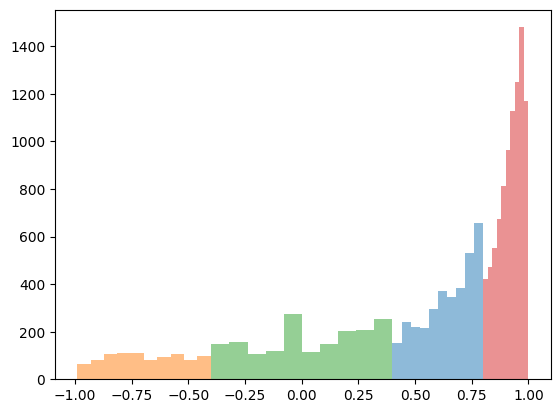

In [ ]:
for sentiment_class, scores in sentiment_scores_by_class.items():
    plt.hist(scores, label=sentiment_class, alpha=0.5)

DeltaGenerator()

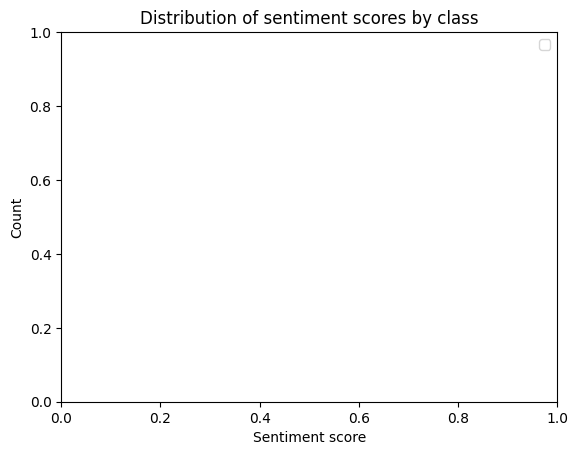

In [ ]:
plt.xlabel("Sentiment score")
plt.ylabel("Count")
plt.title("Distribution of sentiment scores by class")
plt.legend()
st.pyplot(plt)

In [ ]:
df["Sentiment Class"] = sentiment_classes
df["Sentiment Score"] = sentiment_scores
df["Subjectivity"] = blob_subj

In [ ]:
new_df = df[["Score", "Text", "Sentiment Score", "Sentiment Class", "Subjectivity"]]
st.subheader("Input Dataframe")
st.dataframe(new_df.head(30), use_container_width=True)

DeltaGenerator()

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.91s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.186.254:8501



In [ ]:
!npx localtunnel --port 8501